# Energy generation and capacity forecasting - Data Cleaning

In [172]:
import pandas as pd
import locale
from datetime import datetime

import matplotlib.pyplot as plt

locale.setlocale(locale.LC_TIME, '')

'Spanish_Colombia.1252'

In [188]:
raw_data = pd.read_csv("data/energy_raw.csv", quotechar='"', skiprows=3)
raw_data.head()

,Año,Mes_Ordenado,Día,Textbox17,Capacidad_Efectiva_Neta,Textbox26,Generación,Textbox13,Textbox15,Textbox16,Capacidad_Efectiva_Neta1,Generación1
0,2020,01-Enero,1,Capacidad Efectiva Neta (MV),"17.562,244",Generación (GWh),"153,582",Total 2020,"19.326,117","48.481,272","19.326,117","1.179.405,046"
1,2020,01-Enero,2,Capacidad Efectiva Neta (MV),"17.562,244",Generación (GWh),"177,342",Total 2020,"19.326,117","48.481,272","19.326,117","1.179.405,046"
2,2020,01-Enero,3,Capacidad Efectiva Neta (MV),"17.603,244",Generación (GWh),"187,103",Total 2020,"19.326,117","48.481,272","19.326,117","1.179.405,046"
3,2020,01-Enero,4,Capacidad Efectiva Neta (MV),"17.603,244",Generación (GWh),"181,253",Total 2020,"19.326,117","48.481,272","19.326,117","1.179.405,046"
4,2020,01-Enero,5,Capacidad Efectiva Neta (MV),"17.603,244",Generación (GWh),"165,862",Total 2020,"19.326,117","48.481,272","19.326,117","1.179.405,046"


In [189]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7564 entries, 0 to 7563
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Año                       7564 non-null   int64 
 1   Mes_Ordenado              7564 non-null   object
 2   Día                       7564 non-null   int64 
 3   Textbox17                 7564 non-null   object
 4   Capacidad_Efectiva_Neta   7559 non-null   object
 5   Textbox26                 7564 non-null   object
 6   Generación                7564 non-null   object
 7   Textbox13                 7564 non-null   object
 8   Textbox15                 7199 non-null   object
 9   Textbox16                 7564 non-null   object
 10  Capacidad_Efectiva_Neta1  7564 non-null   object
 11  Generación1               7564 non-null   object
dtypes: int64(2), object(10)
memory usage: 709.2+ KB


# Column manipulation

In [190]:
# Column manipulation

col_replacements = {
    'Capacidad_Efectiva_Neta':'capacidad_efectiva_neta_mv',
    'Generación':'generacion_GWh',
    'Textbox15':'total_capacidad',
    'Textbox16':'total_generacion',
    'Año': 'year'
}

raw_data.drop(['Capacidad_Efectiva_Neta1', 
               'Generación1', 'Textbox13',
               'Textbox26', 'Textbox17'], axis=1, inplace=True)
raw_data.rename(columns=col_replacements, inplace=True)

# Transform strings to numeric

In [191]:
# Transform to float the time series
def clean_number(x):
    cleaned_text = x.replace(".", "").replace(",", ".")
    return float(cleaned_text)

raw_data['capacidad_efectiva_neta_mv'] = raw_data['capacidad_efectiva_neta_mv'].astype(str).apply(lambda x: clean_number(x))
raw_data['generacion_GWh'] = raw_data['generacion_GWh'].astype(str).apply(lambda x: clean_number(x))
raw_data['total_capacidad'] = raw_data['total_capacidad'].astype(str).apply(lambda x: clean_number(x))
raw_data['total_generacion'] = raw_data['total_generacion'].astype(str).apply(lambda x: clean_number(x))

# Dates manipulation

In [192]:
# Assign dates
raw_data['Día'] = raw_data['Día'].apply(lambda x: str(x) if x > 9 else '0' + str(x))

raw_data['str_date'] = raw_data['year'].apply(lambda x: str(x)) + " " + \
                       raw_data['Mes_Ordenado'].apply(lambda month: month[3:].lower()) +  " " +\
                       raw_data['Día'].apply(lambda x: str(x))
raw_data['date'] = raw_data['str_date'].apply(lambda date: datetime.strptime(date, "%Y %B %d"))

In [193]:
raw_data.sort_values('date', inplace=True)
raw_data.set_index('date', inplace=True)

# Visualizing clean Time series

Text(0.5, 1.0, 'Energy generation')

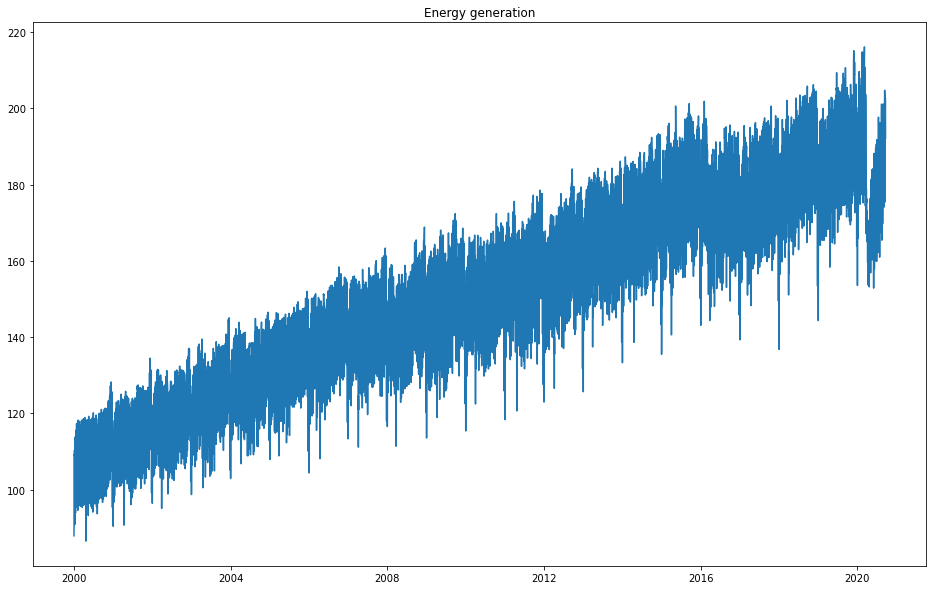

In [194]:
plt.figure(figsize=(16,10))
plt.plot(raw_data['generacion_GWh'])
plt.title("Energy generation")

Text(0.5, 1.0, 'Net Energy capacity (daily)')

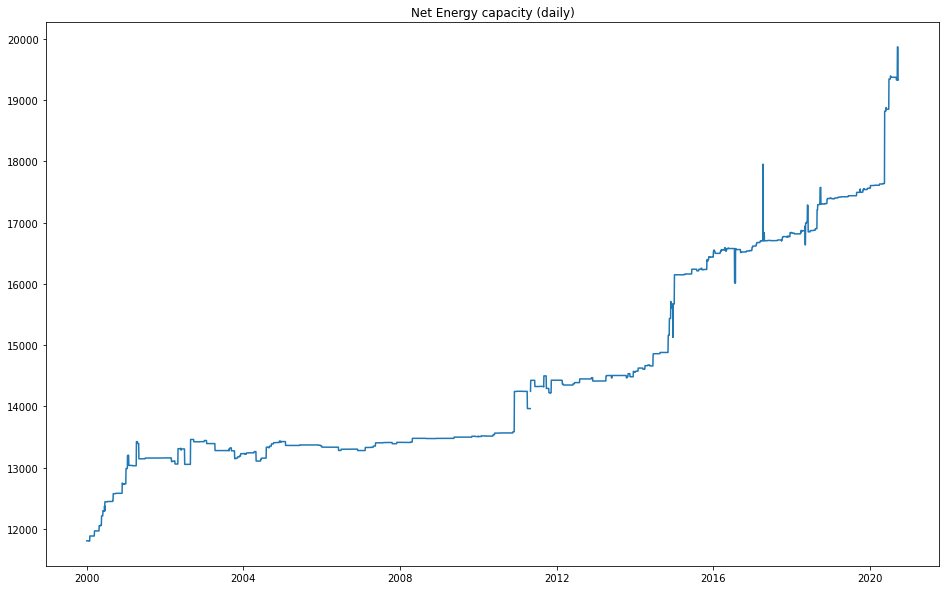

In [195]:
plt.figure(figsize=(16,10))
plt.plot(raw_data['capacidad_efectiva_neta_mv'])
plt.title("Net Energy capacity (daily)")

# Write data

In [196]:
raw_data

,year,Mes_Ordenado,Día,capacidad_efectiva_neta_mv,generacion_GWh,total_capacidad,total_generacion,str_date
date,,,,,,,,
2000-01-01,2000,01-Enero,01,11806.970,87.924,12736.670,41278.096,2000 enero 01
2000-01-02,2000,01-Enero,02,11806.970,88.754,12736.670,41278.096,2000 enero 02
2000-01-03,2000,01-Enero,03,11806.970,105.884,12736.670,41278.096,2000 enero 03
2000-01-04,2000,01-Enero,04,11806.970,109.207,12736.670,41278.096,2000 enero 04
2000-01-05,2000,01-Enero,05,11806.970,109.069,12736.670,41278.096,2000 enero 05
...,...,...,...,...,...,...,...,...
2020-09-15,2020,09-Septiembre,15,19866.117,203.681,19326.117,48481.272,2020 septiembre 15
2020-09-16,2020,09-Septiembre,16,19326.117,196.657,19326.117,48481.272,2020 septiembre 16
2020-09-17,2020,09-Septiembre,17,19326.117,202.818,19326.117,48481.272,2020 septiembre 17


In [197]:
raw_data.isnull().sum()

year                            0
Mes_Ordenado                    0
Día                             0
capacidad_efectiva_neta_mv      5
generacion_GWh                  0
total_capacidad               365
total_generacion                0
str_date                        0
dtype: int64

In [198]:
# Imputation for the missing values
raw_data['capacidad_efectiva_neta_mv'] = raw_data['capacidad_efectiva_neta_mv'].fillna(method = 'ffill')
# Energy generation series (daily)

daily_enery_data = raw_data[['generacion_GWh', 'capacidad_efectiva_neta_mv', 'str_date']]
daily_enery_data.to_csv("data/daily_enery_data.csv")

# Energy capacity (yearly) - Year 2009 (Energy capacity missing)
yearly_energy_data = raw_data[['year', 'total_capacidad', 'total_generacion']].drop_duplicates().fillna(method= 'ffill').set_index('year')
yearly_energy_data.to_csv("data/yearly_energy_data.csv")

Text(0.5, 1.0, 'Energy generation (Yearly)')

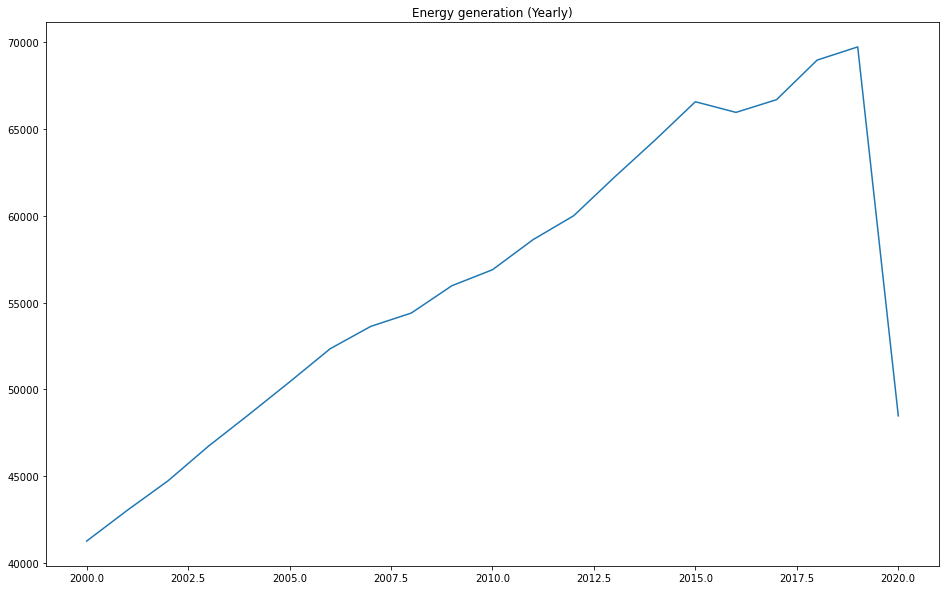

In [199]:
plt.figure(figsize=(16,10))
plt.plot(yearly_energy_data['total_generacion'])
plt.title("Energy generation (Yearly)")

Text(0.5, 1.0, 'Energy capacity (Yearly)')

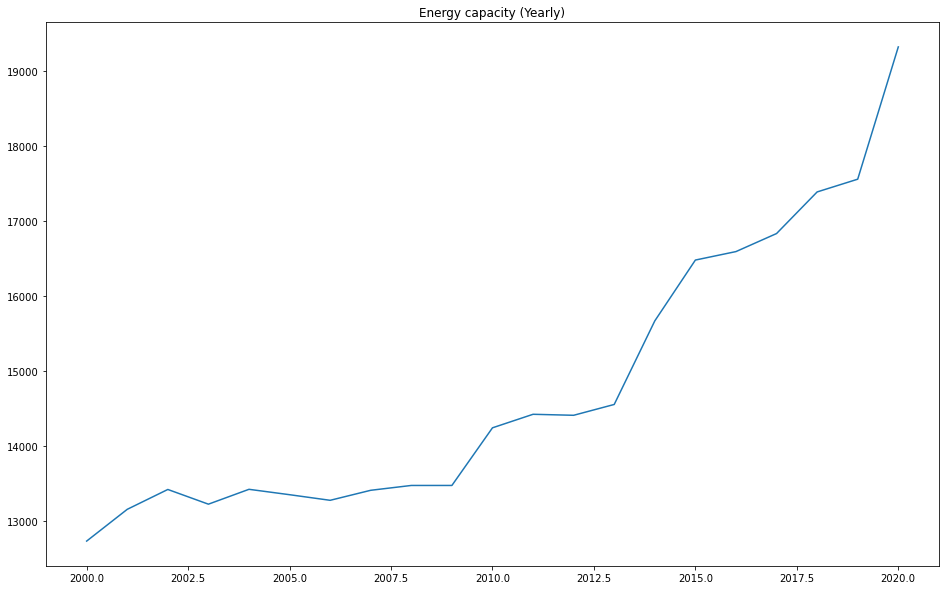

In [200]:
plt.figure(figsize=(16,10))
plt.plot(yearly_capacity['total_capacidad'])
plt.title("Energy capacity (Yearly)")